In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
idx = pd.IndexSlice
sns.set_style("darkgrid")
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
matplotlib.rc('font', size=25) 

In [3]:
segp = r'C:\Users\b1090197\OneDrive\Documents\XSki\xski\files\segment_times.csv'
sp = r'C:\Users\b1090197\OneDrive\Documents\XSki\xski\files\split_times.csv'

seg_time = pd.read_csv(segp, header=[0,1], index_col=[0])
seg_time.columns.rename("Participant", level=0, inplace=True)
seg_time.columns.rename("Intensity", level=1, inplace=True)

splits = pd.read_csv(sp, header=[0,1], index_col=[0])
splits.columns.rename("Participant", level=0, inplace=True)
splits.columns.rename("Intensity", level=1, inplace=True)

In [4]:
splits

Participant          P3                                  P5             \
Intensity          easy        hard      medium        easy       hard   
seg1_flat     74.150000   61.583333   66.979167   43.158333  31.100000   
seg2_up      117.154167   96.083333  103.729167   55.158333  39.100000   
seg3_down    124.904167  103.833333  110.979167   60.908333  44.600000   
seg4_turn    158.654167  138.333333  144.479167   79.158333  60.350000   
seg5_up      179.904167  156.083333  164.479167   86.158333  65.350000   
seg6_down    198.404167  172.083333  183.229167   95.908333  73.850000   
seg7_flat    245.583333  216.208333  214.925000  123.225000  95.491667   

Participant                      P6                                 P7  \
Intensity        medium        easy       hard      medium        easy   
seg1_flat     34.216667   39.020833  27.579167   34.520833   55.391667   
seg2_up       43.716667   50.775000  34.079167   43.020833   74.391667   
seg3_down     49.216667   56.525000  38.829167   48.270833   81.391667   
seg4_turn     65.720833   76.275000  52.079167   64.770833  111.391667   
seg5_up       70.970833   82.525000  56.079167   69.520833  124.641667   
seg6_down     79.720833   92.025000  63.329167   77.520833  135.641667   
seg7_flat    100.637500  123.991667  92.720833  107.870833  178.258333   

Participant                                 P12                          \
Intensity          hard      medium        easy        hard      medium   
seg1_flat     37.462500   44.808333   73.712500   60.720833   65.750000   
seg2_up       49.212500   58.808333  105.212500   90.720833   90.250000   
seg3_down     55.462500   65.308333  113.712500   98.475000   97.500000   
seg4_turn     76.712500   89.058333  147.962500  132.225000  130.004167   
seg5_up       84.962500   98.058333  170.466667  152.975000  148.754167   
seg6_down     94.212500  108.058333  186.466667  165.225000  160.754167   
seg7_flat    122.279167  141.683333  238.212500  199.450000  206.662500   

Participant         P13                        
Intensity          easy      hard      medium  
seg1_flat     45.479167   36.3125   39.233333  
seg2_up       59.979167   46.3125   49.983333  
seg3_down     65.729167   51.5625   55.483333  
seg4_turn     82.979167   65.3125   71.487500  
seg5_up       90.729167   70.5625   78.237500  
seg6_down    101.479167   80.3125   88.237500  
seg7_flat    129.625000  101.6375  113.745833

In [5]:
seg_time.loc['finish_time']=np.sum(seg_time.values,axis=0)

In [23]:
seg_time

Participant          P3                                  P5             \
Intensity          easy        hard      medium        easy       hard   
seg1_flat     74.150000   61.583333   66.979167   43.158333  31.100000   
seg2_up       43.004167   34.500000   36.750000   12.000000   8.000000   
seg3_down      7.750000    7.750000    7.250000    5.750000   5.500000   
seg4_turn     33.750000   34.500000   33.500000   18.250000  15.750000   
seg5_up       21.250000   17.750000   20.000000    7.000000   5.000000   
seg6_down     18.500000   16.000000   18.750000    9.750000   8.500000   
seg7_flat     47.179167   44.125000   31.695833   27.316667  21.641667   
finish_time  245.583333  216.208333  214.925000  123.225000  95.491667   

Participant                      P6                                 P7  \
Intensity        medium        easy       hard      medium        easy   
seg1_flat     34.216667   39.020833  27.579167   34.520833   55.391667   
seg2_up        9.500000   11.754167   6.500000    8.500000   19.000000   
seg3_down      5.500000    5.750000   4.750000    5.250000    7.000000   
seg4_turn     16.504167   19.750000  13.250000   16.500000   30.000000   
seg5_up        5.250000    6.250000   4.000000    4.750000   13.250000   
seg6_down      8.750000    9.500000   7.250000    8.000000   11.000000   
seg7_flat     20.916667   31.966667  29.391667   30.350000   42.616667   
finish_time  100.637500  123.991667  92.720833  107.870833  178.258333   

Participant                                 P12                          \
Intensity          hard      medium        easy        hard      medium   
seg1_flat     37.462500   44.808333   73.712500   60.720833   65.750000   
seg2_up       11.750000   14.000000   31.500000   30.000000   24.500000   
seg3_down      6.250000    6.500000    8.500000    7.754167    7.250000   
seg4_turn     21.250000   23.750000   34.250000   33.750000   32.504167   
seg5_up        8.250000    9.000000   22.504167   20.750000   18.750000   
seg6_down      9.250000   10.000000   16.000000   12.250000   12.000000   
seg7_flat     28.066667   33.625000   51.745833   34.225000   45.908333   
finish_time  122.279167  141.683333  238.212500  199.450000  206.662500   

Participant         P13                        
Intensity          easy      hard      medium  
seg1_flat     45.479167   36.3125   39.233333  
seg2_up       14.500000   10.0000   10.750000  
seg3_down      5.750000    5.2500    5.500000  
seg4_turn     17.250000   13.7500   16.004167  
seg5_up        7.750000    5.2500    6.750000  
seg6_down     10.750000    9.7500   10.000000  
seg7_flat     28.145833   21.3250   25.508333  
finish_time  129.625000  101.6375  113.745833

In [6]:
# sort by intensity
splits = pd.concat([splits.loc[:,idx[:,'easy']], splits.loc[:,idx[:,'medium']], splits.loc[:,idx[:,'hard']]], axis=1)
seg_time= pd.concat([seg_time.loc[:,idx[:,'easy']], seg_time.loc[:,idx[:,'medium']], seg_time.loc[:,idx[:,'hard']]], axis=1)

In [7]:
splits.loc[:,idx[:,'hard']]
splits.loc['start']=np.zeros(splits.shape[1])

In [8]:
aa = splits.iloc[:-1,:]
ab = pd.DataFrame(splits.iloc[-1,:]).T
splits = pd.concat([ab,aa],axis=0)

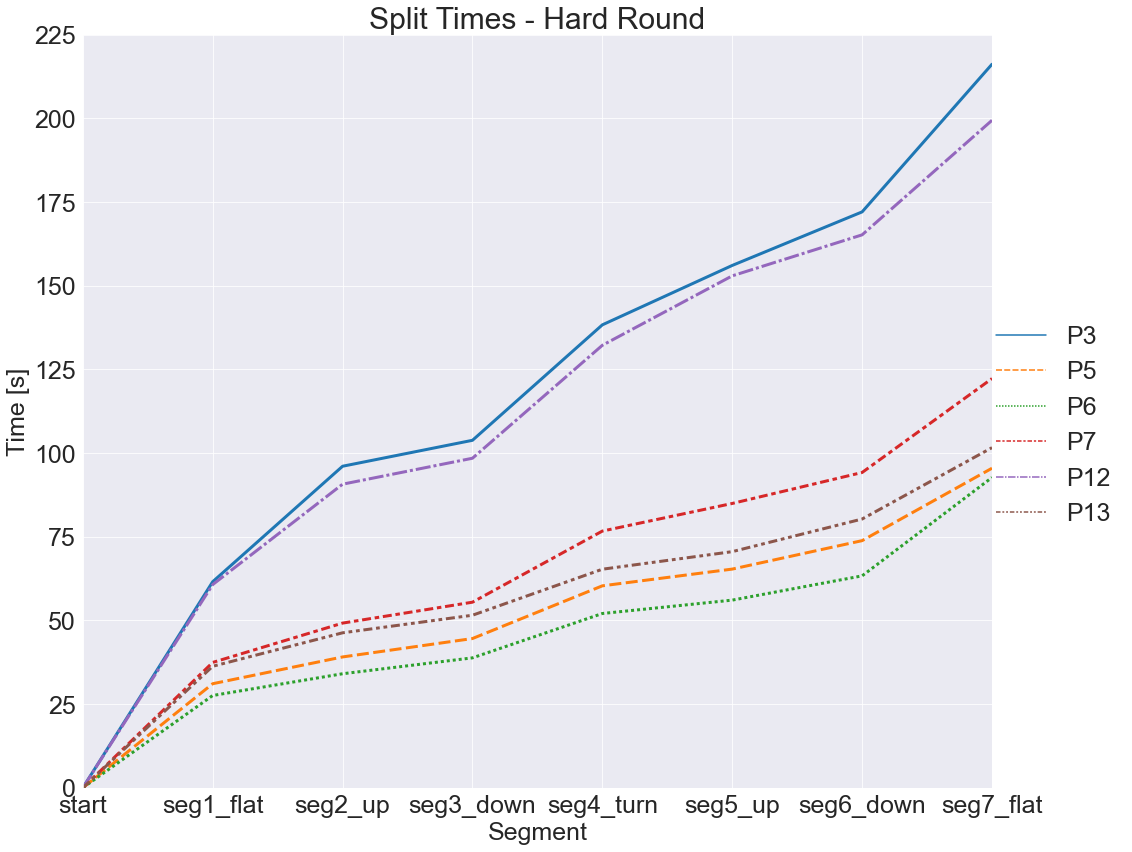

In [20]:
sns.relplot(data=splits.loc[:,idx[:,'hard']],  aspect=1.2, height=12, kind='line', linewidth = 3).set(
ylim=[0,225],
xlim=[0,7],
xlabel = 'Segment',
ylabel = 'Time [s]',
title = 'Split Times - Hard Round')

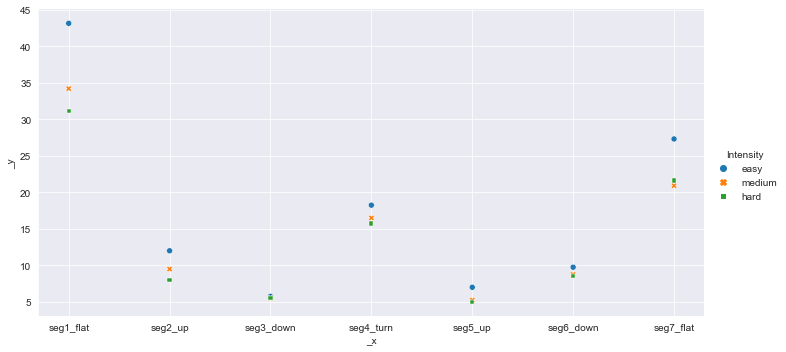

In [8]:
sns.relplot(data=seg_time['P5'], aspect=2)

In [9]:
splits.columns.get_level_values(0).unique()

Index(['P3', 'P5', 'P6', 'P7', 'P12', 'P13'], dtype='object', name='Participant')

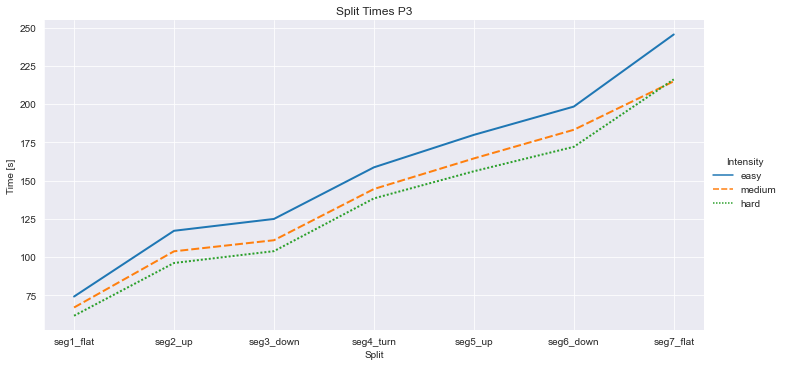

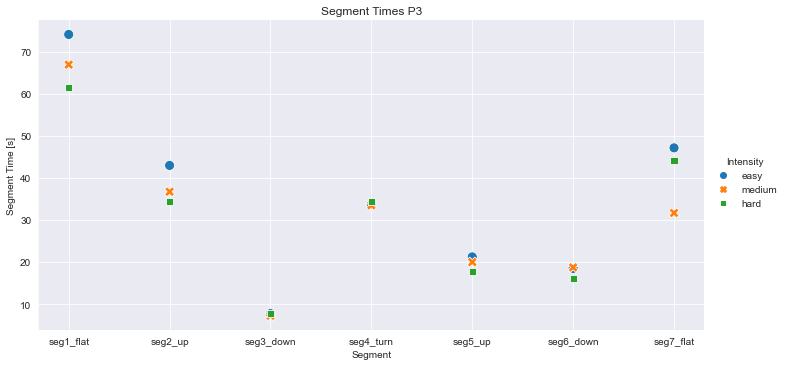

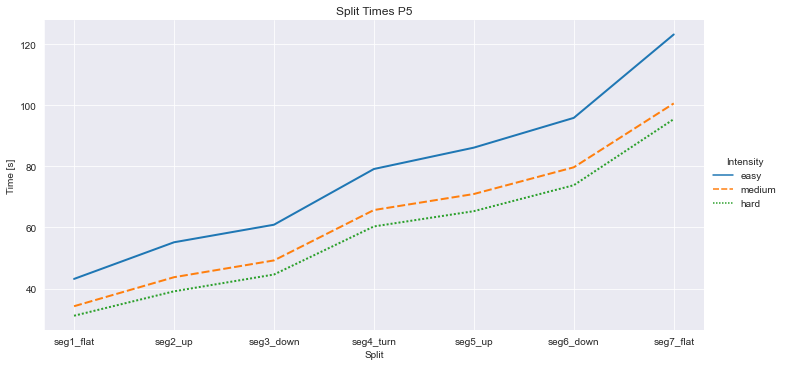

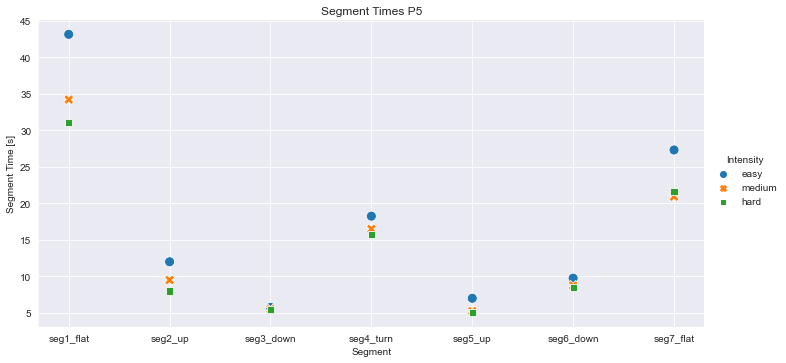

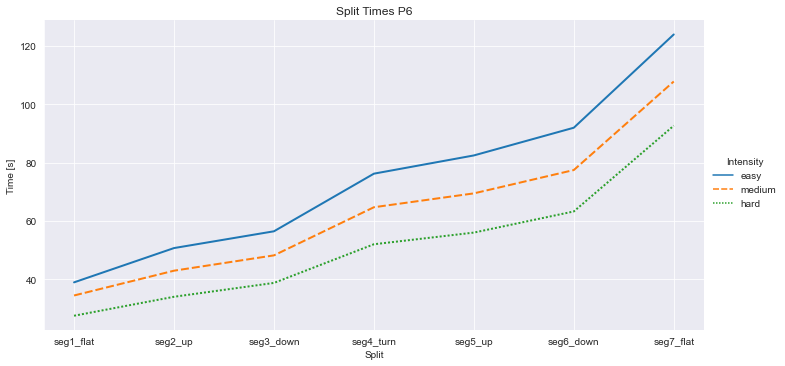

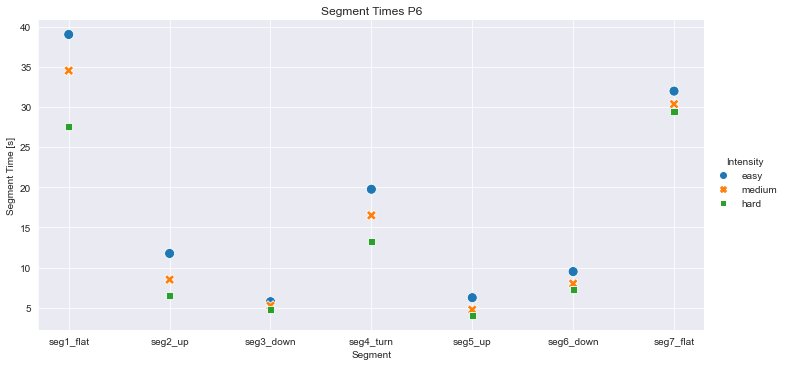

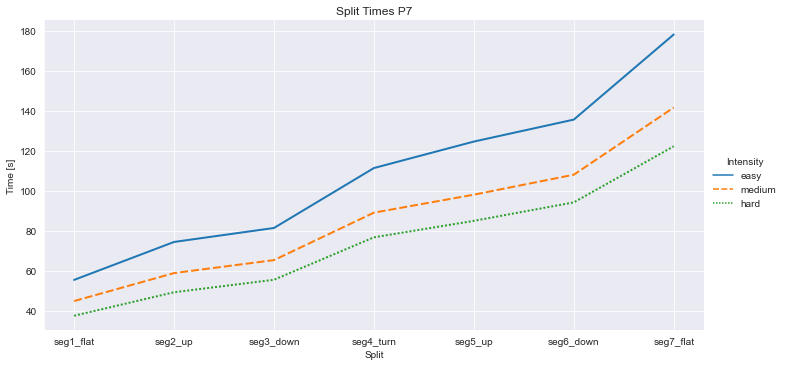

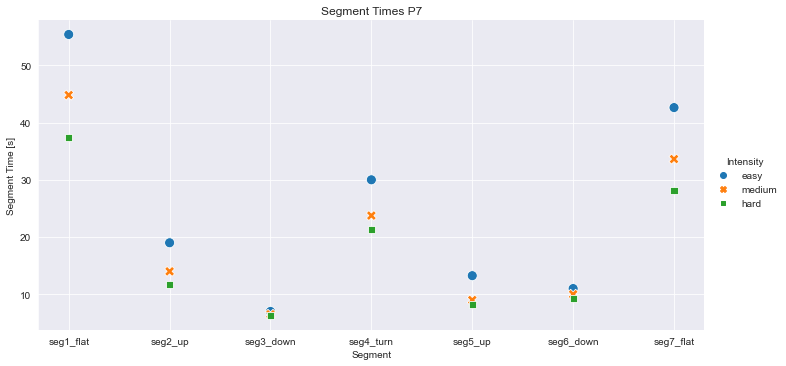

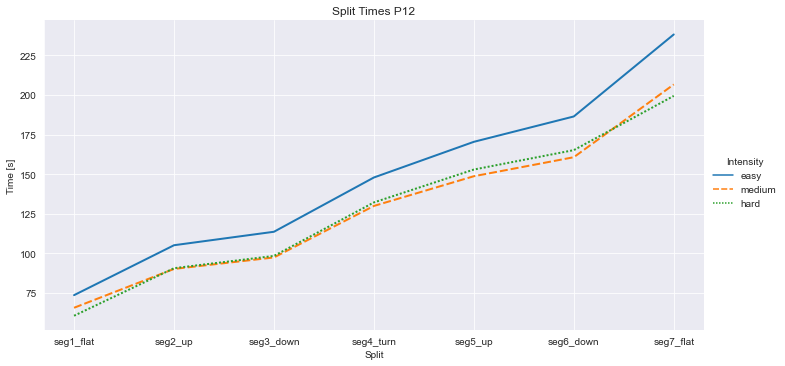

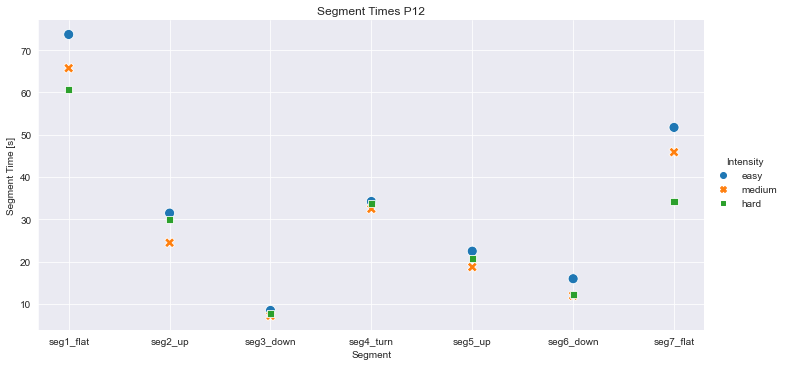

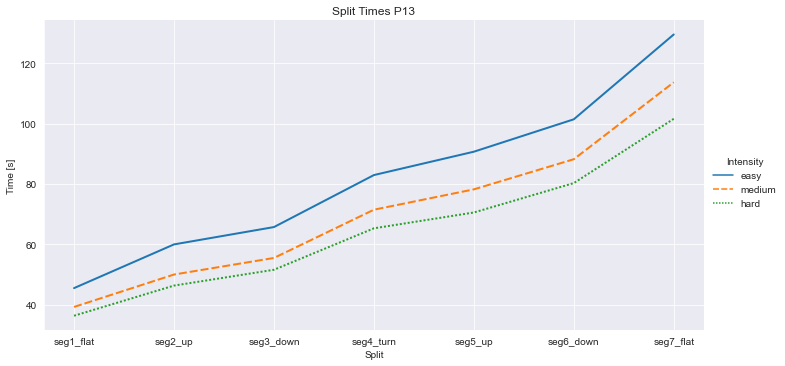

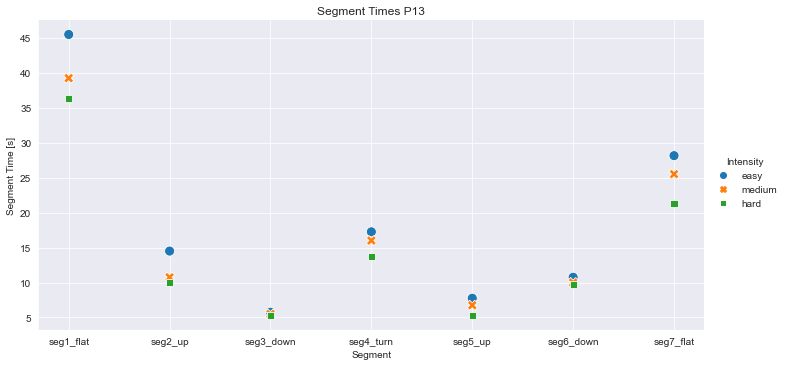

In [10]:
for p in splits.columns.get_level_values(0).unique():
    sns.relplot(data=splits[p], kind='line', aspect = 2, linewidth=2).set(title='Split Times '+ p, ylabel='Time [s]', xlabel='Split')
    sns.relplot(data=seg_time[p], aspect = 2,s=100).set(title='Segment Times '+ p, ylabel='Segment Time [s]', xlabel='Segment')


In [ ]:
# calculate relative Speed Increase Ratio 
# if ==1 --> equal relative increase with each intensity 
# if < 1 --> smaller relative increase from medium to hard than from easy to medium
# if > 1 --> smaller relative increase from easy to medium than from medium to hard
# example:
#    time easy = 60 seconds
#    time medium = 30 seconds   --> increase of 50 %
#    time hard = 20 seconds     --> increase of 33 %
#  ==> Ratio = 1.5


In [11]:
ratio = pd.DataFrame(columns=splits.columns.get_level_values(0).unique(), index=splits.index)
for p in splits.columns.get_level_values(0).unique():
    em = splits[p]['medium']/splits[p]['easy']*100
    mh = splits[p]['hard']/splits[p]['medium']*100
    ratio[p]=em/mh
ratio['even Ratio']=np.ones(7)

In [12]:
ratio

Participant,P3,P5,P6,P7,P12,P13,even Ratio
seg1_flat,0.982438,0.872269,1.107350,0.967557,0.965857,0.932055,1.0
seg2_up,0.955864,0.886148,1.069593,0.944665,0.853336,0.899398,1.0
seg3_down,0.949662,0.891688,1.061625,0.944839,0.848936,0.908308,1.0
seg4_turn,0.951113,0.904133,1.056119,0.928176,0.863872,0.942963,1.0
seg5_up,0.963439,0.894575,1.044342,0.907985,0.848552,0.956113,1.0
seg6_down,0.983331,0.897298,1.031163,0.913724,0.838779,0.955314,1.0
seg7_flat,0.869967,0.860707,1.012135,0.920948,0.898928,0.982038,1.0


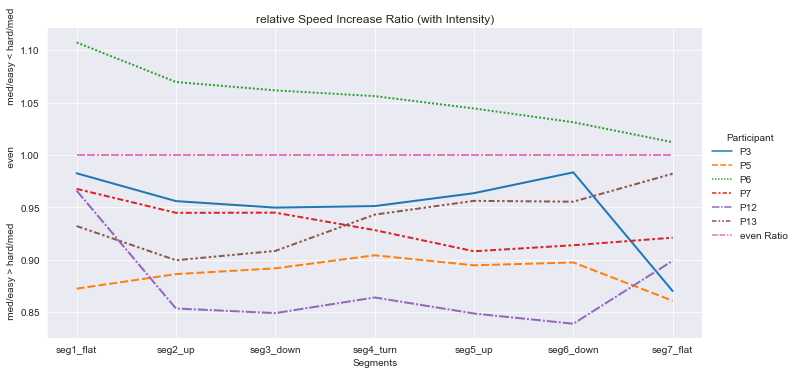

In [13]:
sns.relplot(data=ratio, aspect = 2, kind='line', linewidth=2).set(
        ylabel='               med/easy > hard/med                    even               med/easy < hard/med',
        xlabel='Segments',
        title='relative Speed Increase Ratio (with Intensity)'
    )


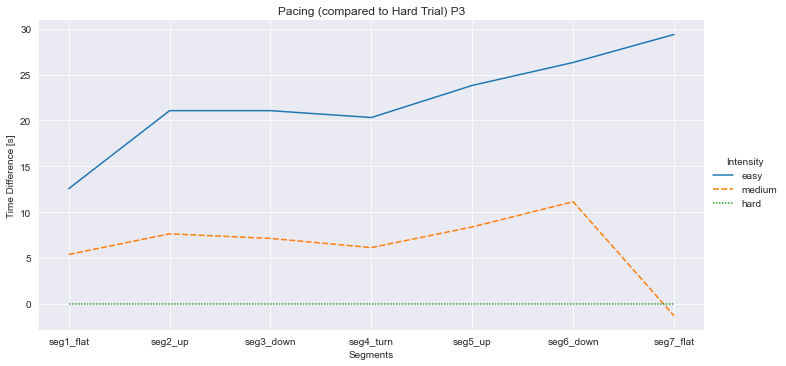

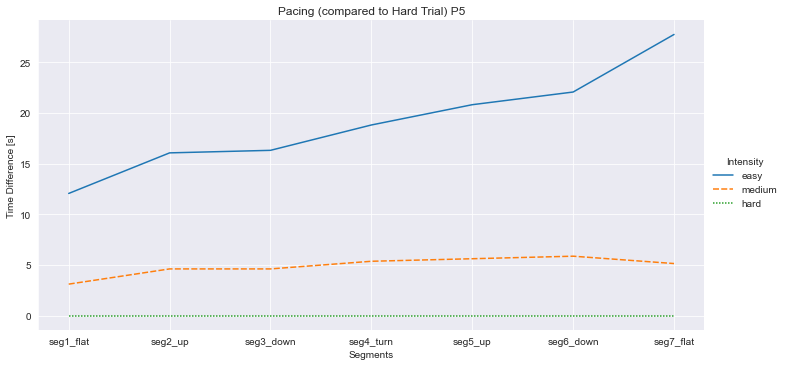

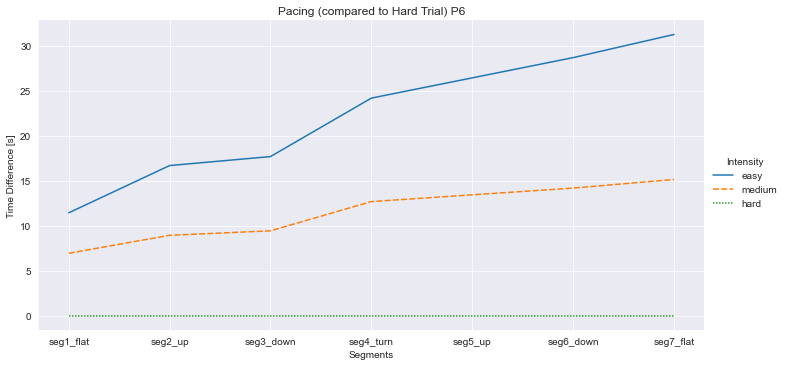

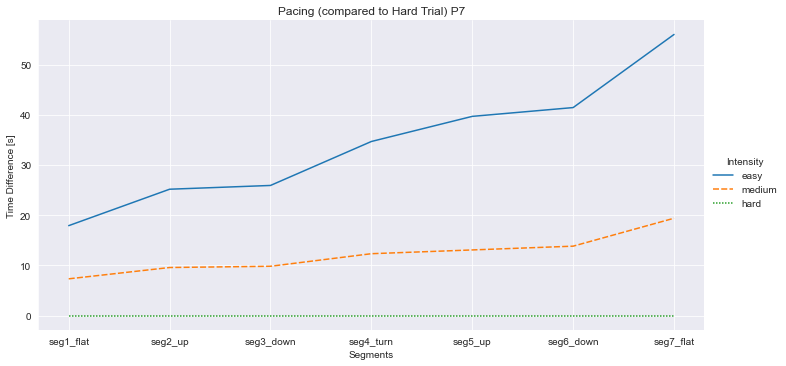

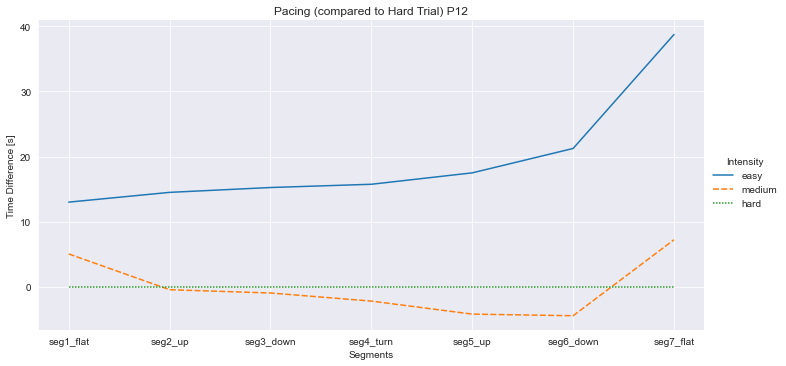

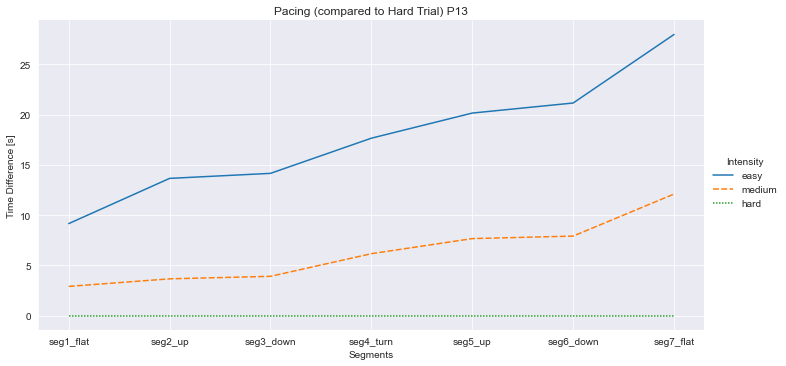

In [14]:
for p in splits.columns.get_level_values(0).unique():
    med = splits[p]['hard'].values
    sns.relplot(data=splits[p].apply(lambda x: x- med, axis=0), aspect=2, kind='line').set(
        ylabel='Time Difference [s]',
        xlabel='Segments',
        title='Pacing (compared to Hard Trial) '+ p
    )

In [21]:
mx = (29386-629)/240
ex = (35148-1617)/240
hx = (27042-400)/240

In [22]:
p8 = pd.DataFrame(np.array([['P8', 'easy', ex],['P8', 'medium', mx],['P8', 'hard', hx]]), columns=['Participant', 'Intensity', 'finish_time'])

In [23]:
mx = (29500-0)/240
ex = (36400-880)/240
hx = (28050-400)/240

In [24]:
p14 = pd.DataFrame(np.array([['P14', 'easy', ex],['P14', 'medium', mx],['P14', 'hard', hx]]), columns=['Participant', 'Intensity', 'finish_time'])
p14

,Participant,Intensity,finish_time
0,P14,easy,148.0
1,P14,medium,122.91666666666667
2,P14,hard,115.20833333333333


In [25]:
d = pd.DataFrame(seg_time.loc['finish_time'])
d=d.reset_index()
d = pd.concat([d,p14,p8], axis=0)
#d.sort_values(by='Intensity')

In [26]:
d['finish_time'] = pd.to_numeric(d['finish_time'])

In [27]:
#d = pd.DataFrame(seg_time.loc['finish_time'])
#d=d.reset_index()
a=d[d['Intensity']=='easy']
b=d[d['Intensity']=='medium']
c=d[d['Intensity']=='hard']
d=pd.concat([a,b,c], axis=0)
d['finish_time'] = pd.to_numeric(d['finish_time'])
d

,Participant,Intensity,finish_time
0,P3,easy,245.583333
1,P5,easy,123.225000
2,P6,easy,123.991667
3,P7,easy,178.258333
4,P12,easy,238.212500
5,P13,easy,129.625000
0,P14,easy,148.000000
0,P8,easy,139.712500
6,P3,medium,214.925000
7,P5,medium,100.637500


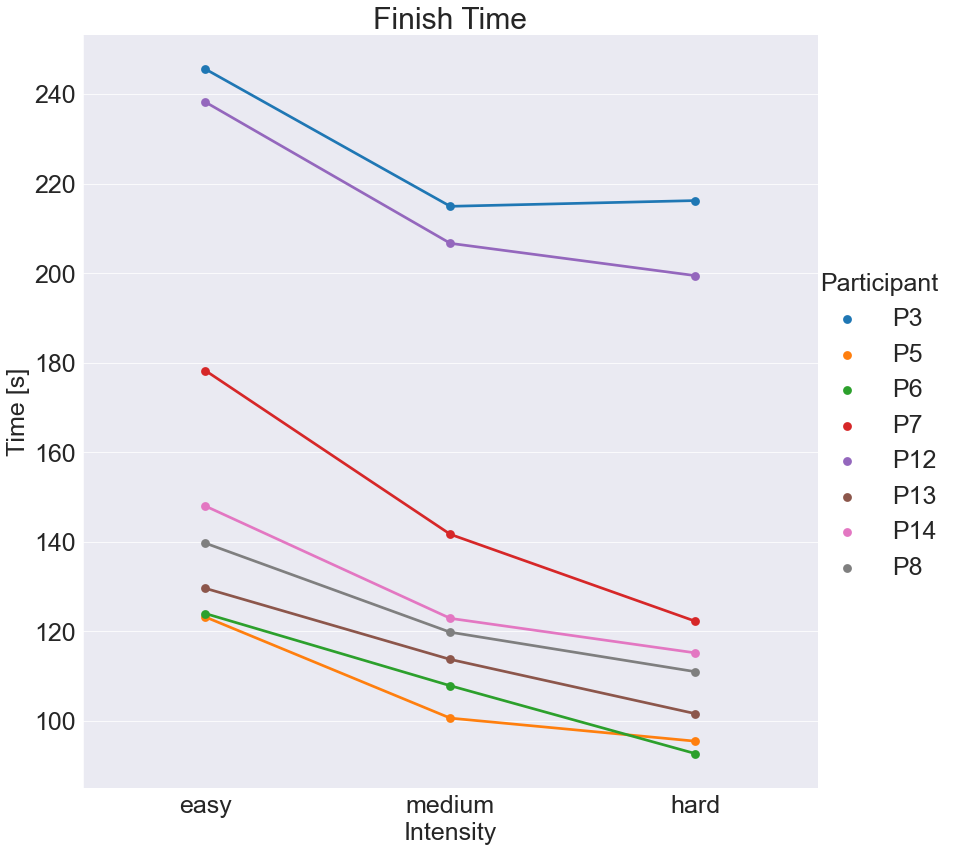

In [33]:
sns.catplot(data=d, x='Intensity',  y='finish_time', hue='Participant', aspect=1, height = 12,kind = 'point').set(
ylabel = 'Time [s]',
title = 'Finish Time',
#ylim = [75,275]
)
#plt.legend(markerscale=20, fontsize=10)

# catplot

In [15]:
segp = r'C:\Users\b1090197\OneDrive\Documents\XSki\xski\files\segment_times_T.csv'
sp = r'C:\Users\b1090197\OneDrive\Documents\XSki\xski\files\split_times_T.csv'

seg_time = pd.read_csv(segp)
seg_time.iloc[:,:2]=seg_time.iloc[:,:2].astype('category')
splits = pd.read_csv(sp)
splits.iloc[:,:2]=splits.iloc[:,:2].astype('category')

In [16]:
seg_time

,Participant,Intensity,seg1_flat,seg2_up,seg3_down,seg4_turn,seg5_up,seg6_down,seg7_flat
0,P3,easy,74.150000,43.004167,7.750000,33.750000,21.250000,18.50,47.179167
1,P3,hard,61.583333,34.500000,7.750000,34.500000,17.750000,16.00,44.125000
2,P3,medium,66.979167,36.750000,7.250000,33.500000,20.000000,18.75,31.695833
3,P5,easy,43.158333,12.000000,5.750000,18.250000,7.000000,9.75,27.316667
4,P5,hard,31.100000,8.000000,5.500000,15.750000,5.000000,8.50,21.641667
5,P5,medium,34.216667,9.500000,5.500000,16.504167,5.250000,8.75,20.916667
6,P6,easy,39.020833,11.754167,5.750000,19.750000,6.250000,9.50,31.966667
7,P6,hard,27.579167,6.500000,4.750000,13.250000,4.000000,7.25,29.391667
8,P6,medium,34.520833,8.500000,5.250000,16.500000,4.750000,8.00,30.350000
9,P7,easy,55.391667,19.000000,7.000000,30.000000,13.250000,11.00,42.616667


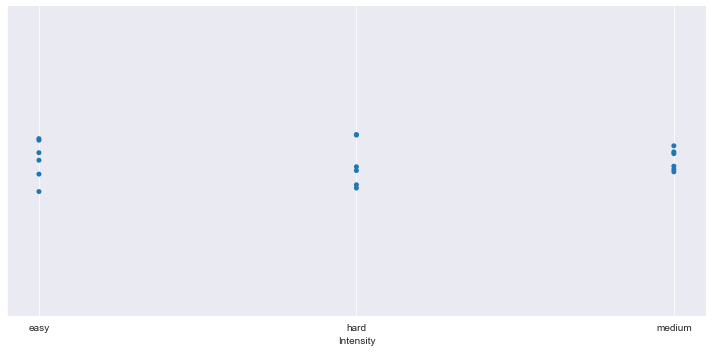

In [17]:
sns.catplot(data=seg_time, aspect=2, x='Intensity', )